In [1]:
path = "/home/amigos/hdd/data/radio_pointing_line_9/n20191002022236_12CO_2-1_cross_RCW38_pointing"

In [2]:
import necstdb
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n = necstdb.opendb(path)
_obs = n.open_table("obsmode")
obsmode = numpy.array(_obs.read())

In [4]:
hotmask= obsmode.T[1] == b"HOT       "
offmask= obsmode.T[1] == b"OFF       "
onmask= obsmode.T[1] == b"ON        "

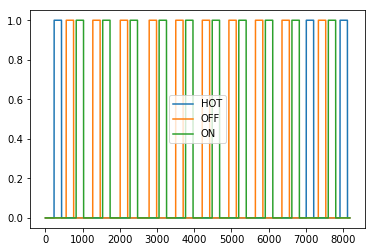

In [8]:
plt.plot(hotmask, label="HOT")
plt.plot(offmask, label="OFF")
plt.plot(onmask, label = "ON")
plt.legend()

In [9]:
scan_number = obsmode.T[2]
lamdel = obsmode.T[3]
betdel = obsmode.T[4]
numpy.unique(scan_number)

array([b'1.0', b'2.0', b'999999.0'],
      dtype='|S32')

In [10]:
numpy.unique(lamdel)

array([b'-30.0', b'-60.0', b'0.0', b'30.0', b'60.0', b'999999.0'],
      dtype='|S32')

In [51]:
xp = n.open_table("xffts_board01")

In [52]:
xpd = xp.read()

In [53]:
xpd = numpy.array(xpd)

In [54]:
xpd.T[0]

array([  1.56998296e+09,   1.56998296e+09,   1.56998296e+09, ...,
         1.56998337e+09,   1.56998337e+09,   1.56998337e+09])

In [55]:
xmask = betdel == b"-60.0"

In [56]:
mask2 = numpy.logical_and(onmask, xmask)

In [57]:
#timestamp確認
start = obsmode.T[0][mask2][0]
end   = obsmode.T[0][mask2][-1]

In [58]:
s_index = numpy.where(xpd.T[0] > float(start))[0][0]
e_index = numpy.where(xpd.T[0] < float(end))[0][-1]

In [59]:
s_index

3107

In [60]:
e_index

3244

In [61]:
on = numpy.mean(xpd.T[1:].T[s_index:e_index], axis=0)

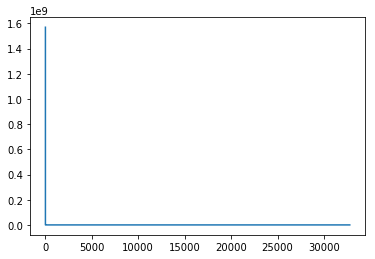

In [62]:
%matplotlib inline
plt.plot(on)
plt.show()

In [63]:
mask3 = numpy.logical_and(offmask, xmask)

In [64]:
#timestamp確認
start2 = obsmode.T[0][mask3][0]
end2   = obsmode.T[0][mask3][-1]
s_index2 = numpy.where(xpd.T[0] > float(start2))[0][0]
e_index2 = numpy.where(xpd.T[0] < float(end2))[0][-1]

In [65]:
off = numpy.mean(xpd.T[1:].T[s_index2:e_index2], axis=0)

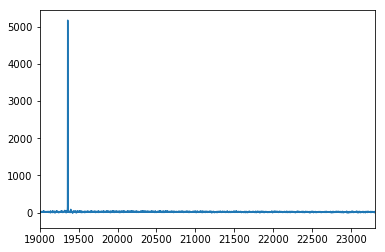

In [66]:
%matplotlib inline
plt.plot(on-off)
#plt.plot(on)
#plt.plot(off)
plt.xlim(19000, 23300)
#plt.ylim(-1000, 5000)
plt.show()

In [67]:
#timestamp確認
# start3 = obsmode.T[0][hotmask][0]
# end3   = obsmode.T[0][hotmask][-1]
# s_index3 = numpy.where(xpd.T[0] > float(start3))[0][0]
# e_index3 = numpy.where(xpd.T[0] < float(end3))[0][-1]
# hot = numpy.mean(xpd.T[1:].T[s_index:e_index], axis=0)

In [68]:
start3

b'1569982968.547987'

In [69]:
end3

b'1569982978.5356822'

In [70]:
scan_number[hotmask]

array([b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
       b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0', b'1.0',
      

In [71]:
scanmask = scan_number == b"1.0"

In [72]:
maskhot = numpy.logical_and(hotmask, scanmask)

In [73]:
start3 = obsmode.T[0][maskhot][0]
end3   = obsmode.T[0][maskhot][-1]
s_index3 = numpy.where(xpd.T[0] > float(start3))[0][0]
e_index3 = numpy.where(xpd.T[0] < float(end3))[0][-1]

In [74]:
hot = numpy.mean(xpd.T[1:].T[s_index3:e_index3], axis=0)

In [75]:
hot

array([  1.56998297e+09,   4.67327539e+04,   6.37717871e+03, ...,
         1.15922920e+04,   1.15808496e+04,   1.17636650e+04])

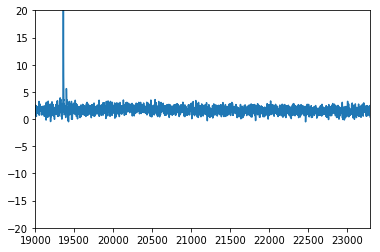

In [76]:
plt.plot(300*(on-off)/(hot-off))
plt.xlim(19000, 23300)
plt.ylim(-20, 20)
plt.show()

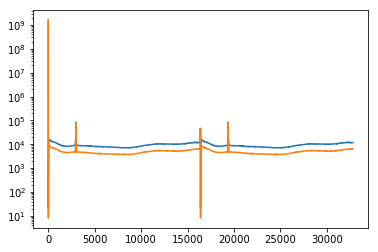

In [77]:
plt.plot(hot)
plt.plot(on)
plt.yscale("log")
plt.show()

以下は本番解析

In [78]:
scanmask1 = scan_number == b"1.0"
scanmask2 = scan_number == b"2.0"

In [79]:
mask1 = numpy.logical_and(hotmask, scanmask1)
mask2 = numpy.logical_and(hotmask, scanmask2)
mask = [mask1, mask2]

In [80]:
hot = []
for i in range(2):
    start = obsmode.T[0][mask[i]][0]
    end   = obsmode.T[0][mask[i]][-1]
    s_index = numpy.where(xpd.T[0] > float(start))[0][0]
    e_index = numpy.where(xpd.T[0] < float(end))[0][-1]
#     if i ==1:# 観測ミスのため　will be deleted
#         e_index = 3662
    print(s_index, e_index)
    hot.append(numpy.mean(xpd.T[1:].T[s_index:e_index], axis=0))

162 300
4857 5624


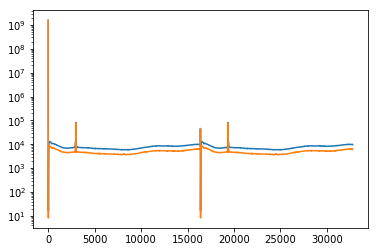

In [82]:
plt.plot(hot[1])
plt.plot(on)
plt.yscale("log")
plt.show()

In [88]:
x = numpy.unique(lamdel)
y = numpy.unique(lamdel)
x = x.tolist()
y = y.tolist()
x.remove( b'999999.0')
y.remove( b'999999.0')

In [95]:
x_off = []
for i in x:
    xmask = lamdel == i
    mask1 = numpy.logical_and(offmask, xmask)
    mask1 = numpy.logical_and(mask1, scanmask1)
    start = obsmode.T[0][mask1][0]
    end   = obsmode.T[0][mask1][-1]
    s_index = numpy.where(xpd.T[0] > float(start))[0][0]
    e_index = numpy.where(xpd.T[0] < float(end))[0][-1]
    print(s_index, e_index)
    x_off.append(numpy.mean(xpd.T[1:].T[s_index:e_index], axis=0))
    
y_off = []
for i in x:
    ymask = betdel == i
    mask1 = numpy.logical_and(offmask, ymask)
    mask1 = numpy.logical_and(mask1, scanmask2)
    start = obsmode.T[0][mask1][0]
    end   = obsmode.T[0][mask1][-1]
    s_index = numpy.where(xpd.T[0] > float(start))[0][0]
    e_index = numpy.where(xpd.T[0] < float(end))[0][-1]
    print(s_index, e_index)
    y_off.append(numpy.mean(xpd.T[1:].T[s_index:e_index], axis=0))

884 1020
388 524
1394 1531
1933 2070
2428 2564
3419 3554
2922 3058
3913 4047
4405 4540
5083 5219


In [96]:
x_on = []
for i in x:
    xmask = lamdel == i
    mask1 = numpy.logical_and(onmask, xmask)
    mask1 = numpy.logical_and(mask1, scanmask1)
    start = obsmode.T[0][mask1][0]
    end   = obsmode.T[0][mask1][-1]
    s_index = numpy.where(xpd.T[0] > float(start))[0][0]
    e_index = numpy.where(xpd.T[0] < float(end))[0][-1]
    print(s_index, e_index)
    x_on.append(numpy.mean(xpd.T[1:].T[s_index:e_index], axis=0))
    
y_on = []
for i in x:
    ymask = betdel == i
    mask1 = numpy.logical_and(onmask, ymask)
    mask1 = numpy.logical_and(mask1, scanmask2)
    start = obsmode.T[0][mask1][0]
    end   = obsmode.T[0][mask1][-1]
    s_index = numpy.where(xpd.T[0] > float(start))[0][0]
    e_index = numpy.where(xpd.T[0] < float(end))[0][-1]
    print(s_index, e_index)
    y_on.append(numpy.mean(xpd.T[1:].T[s_index:e_index], axis=0))

1068 1204
574 710
1579 1715
2118 2255
2612 2748
3603 3740
3107 3244
4096 4232
4589 4726
5268 5404


In [97]:
#確認のため、消します

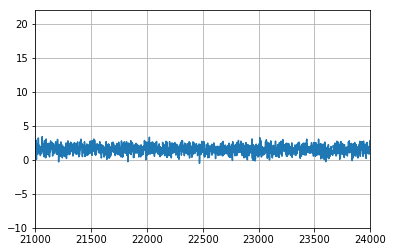

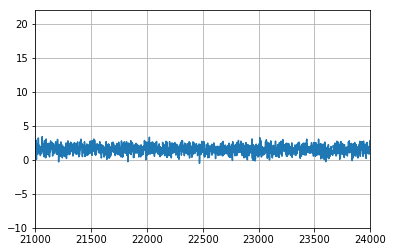

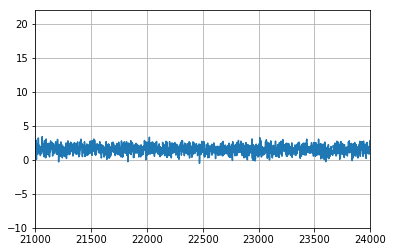

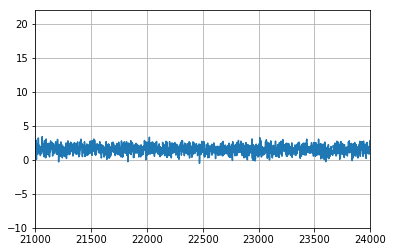

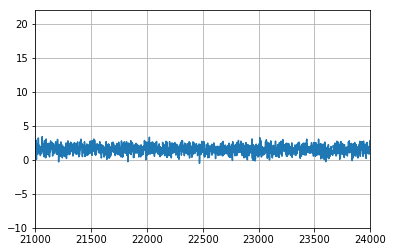

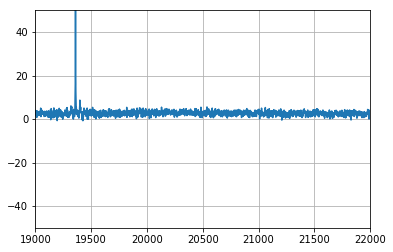

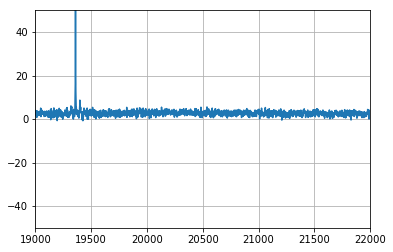

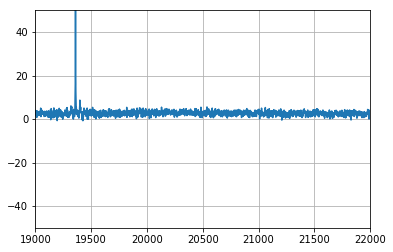

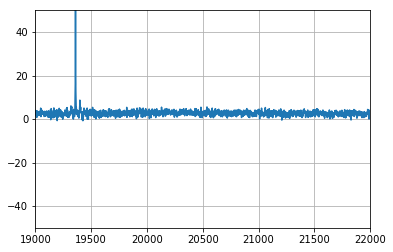

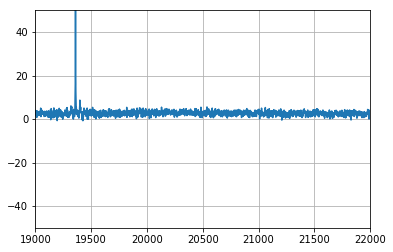

In [98]:
xscan_Ta = []
xscan_integ = []
yscan_Ta = []
yscan_integ = []

mi = 21000
ma = 22000

for i in range(5):
    Ta = 300*(x_on[i] - x_off[i])/(hot[0] - x_off[i])
    xscan_Ta.append(Ta)
    #xscan_integ .append(numpy.sum(Ta[mi:ma]))
    plt.plot(300*(x_on[i] - x_off[i])/(hot[0] - x_off[i]))
    plt.xlim(21000, 24000)
    plt.ylim(-10, 22)
    plt.grid()
    plt.show()
    
for i in range(5):
    Ta = 300*(y_on[i] - y_off[i])/(hot[1] - y_off[i])
    yscan_Ta.append(Ta)
    #yscan_integ .append(numpy.sum(Ta[mi:ma]))
    plt.plot(300*(y_on[i] - y_off[i])/(hot[1] - y_off[i]))
    plt.xlim(19000, 22000)
    plt.ylim(-50, 50)
    plt.grid()
    plt.show()

In [99]:
#baseline fitting

In [100]:
#xscan_integ
xscan_x = [-60, -30, 0, 30, 60]
xscan_y = [0, 0, 0, 0, 0]
#yscan_integ
yscan_x = [0, 0, 0, 0, 0]
yscan_y = [-60, -30, 0, 30, 60]
#xscan_Ta 
#yscan_Ta

In [101]:
def f(x, a, b, c):
    return a*x**2 + b*x + c
def f(x, a, b, c, d):
    return a*x**3 + b*x**2+ c*x + d

def gaussian(x, a, mu, gamma):
    return a * numpy.exp(- gamma * (x - mu) **2)

In [102]:
arr_x = numpy.linspace(0, 32768, 32769)
def  baseline_fitting(arr_x, arr_y, index1, index2, index3, index4):
    tmpdata_y1 = arr_y[index1:index2]
    tmpdata_y2 = arr_y[index3:index4]
    tmpdata_x1 = arr_x[index1:index2]
    tmpdata_x2 = arr_x[index3:index4]
    x = numpy.concatenate([tmpdata_x1, tmpdata_x2])
    y = numpy.concatenate([tmpdata_y1, tmpdata_y2])
    #param = numpy.polyfit(x, y, 2)
    param = numpy.polyfit(x, y, 3)
    arr_y = arr_y - f(arr_x, *param)
    return arr_y

In [111]:
for i in range(5):
    xscan_Ta[i] = baseline_fitting(arr_x, xscan_Ta[i], 8000, 9000, 10000, 11000)
    yscan_Ta[i] = baseline_fitting(arr_x, yscan_Ta[i], 8000, 9000, 10000, 10000)
    
xscan_integ = []
yscan_integ = []


mi = 21200
ma = 21400
for i in range(5):
    xscan_integ .append(numpy.sum(xscan_Ta[i][mi:ma]))
    yscan_integ .append(numpy.sum(yscan_Ta[i][mi:ma]))
    

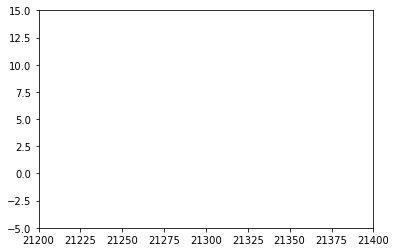

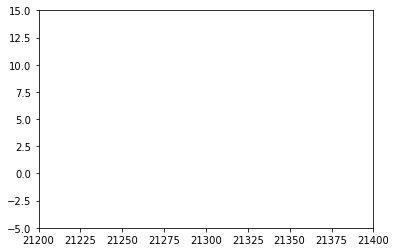

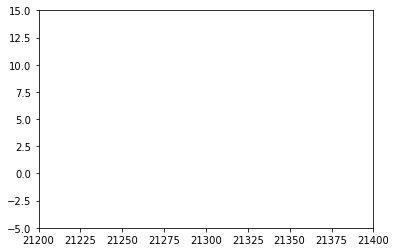

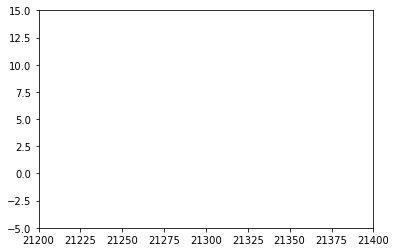

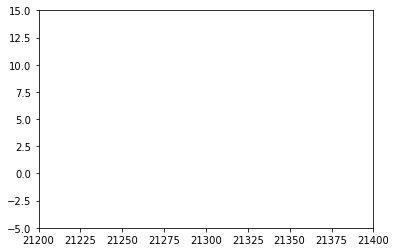

In [112]:
for i in range(5):
    plt.plot(xscan_Ta[i])
    plt.xlim(21200, 21400)
    plt.ylim(-5, 15)
    plt.show()

In [113]:
from scipy.optimize import curve_fit
para_init = numpy.array([25000., 0.1, 0.0001])

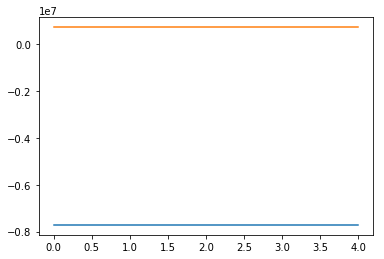

In [114]:
plt.plot(yscan_integ)
plt.plot(xscan_integ)
plt.show()

/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


1199


NameError: name 'savefig' is not defined

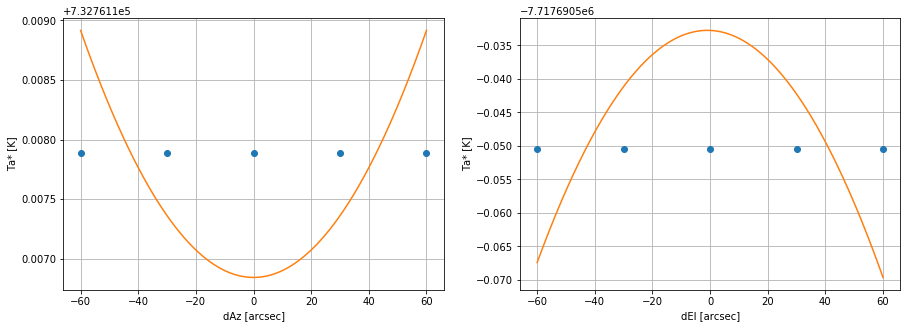

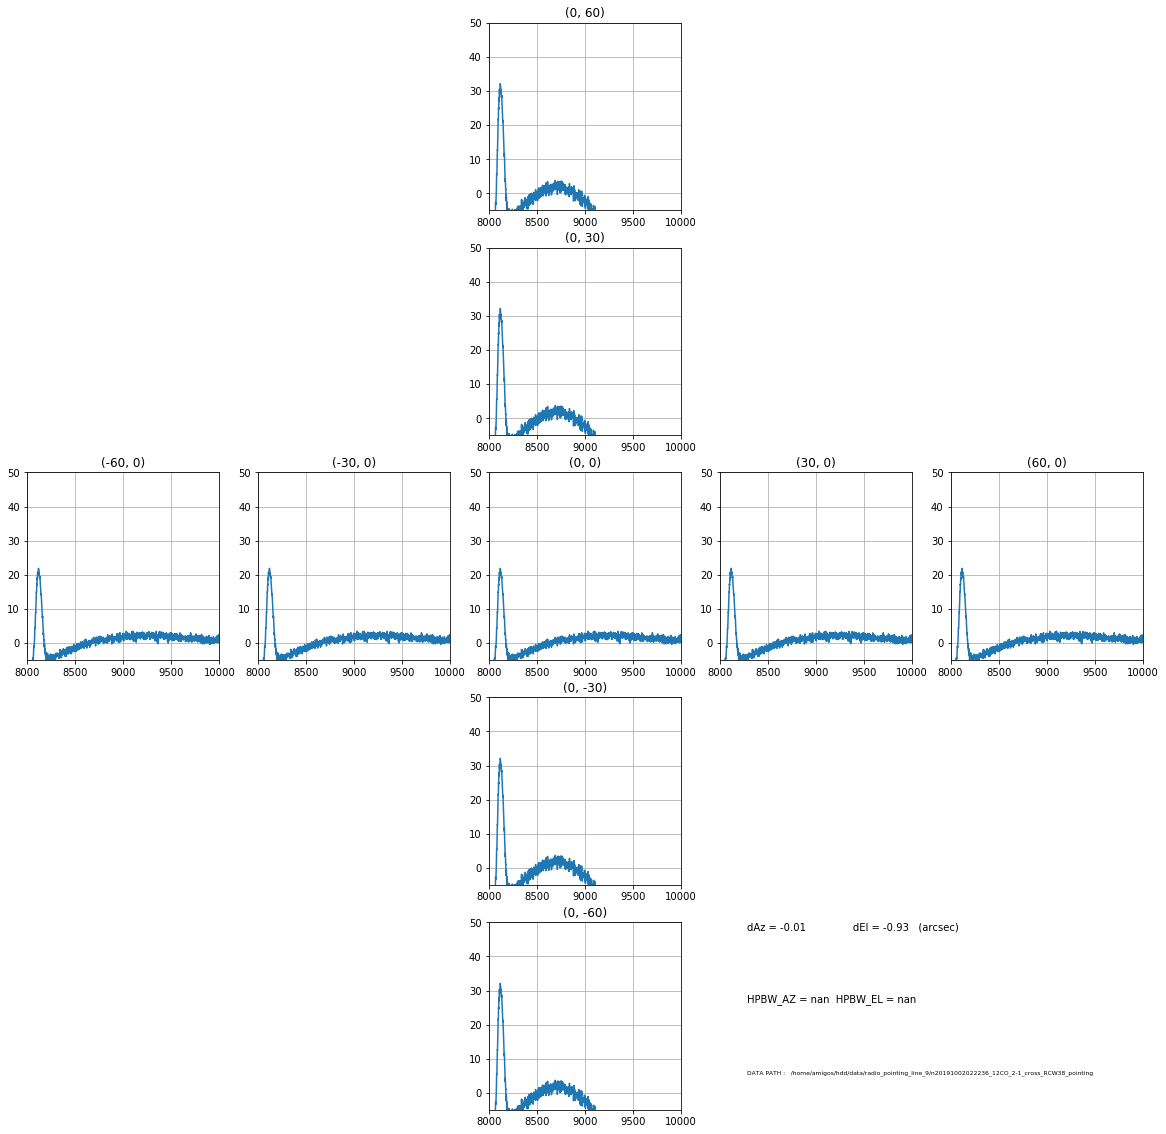

In [115]:
# Gaussian Fitting function
# Az fitting
try:
    popt_az, pcov_az = curve_fit(gaussian, xscan_x, xscan_integ, p0 = para_init, maxfev=10000)
    error_az = numpy.sqrt(numpy.diag(pcov_az))

    x_g = numpy.linspace(xscan_x[0], xscan_x[-1], 1001)
    gaus_az = gaussian(x_g, popt_az[0], popt_az[1], popt_az[2])

# El fitting
    popt_el, pcov_el = curve_fit(gaussian, yscan_y, yscan_integ, p0 = para_init, maxfev=10000)
    error_el = numpy.sqrt(numpy.diag(pcov_el))

    gaus_el = gaussian(x_g, popt_el[0], popt_el[1], popt_el[2])


# dAz dEl
    dAz = popt_az[1]
    dEl = popt_el[1]
    hpbw_az =  1/numpy.sqrt(2*popt_az[2]) *2.35
    hpbw_el = 1/numpy.sqrt(2*popt_el[2]) *2.35


# plot
    
    fig = plt.figure(figsize = (15, 5))

    axlist = [fig.add_subplot(1,2,i+1) for i in range(2)]

    axlist[0].plot(xscan_x, xscan_integ, "o")
    #axlist[0].errorbar(xscan_x, xscan_integ, yerr = error_az[0], fmt = "b+")
    axlist[0].plot(x_g, gaus_az)
    axlist[0].set_xlabel("dAz [arcsec]")
    axlist[0].set_ylabel("Ta* [K]")

    axlist[1].plot(yscan_y, yscan_integ, "o")
    #axlist[1].errorbar(yscan_y, yscan_integ, yerr = error_el[0], fmt = "b+")
    axlist[1].plot(x_g, gaus_el)
    axlist[1].set_xlabel("dEl [arcsec]")
    axlist[1].set_ylabel("Ta* [K]")
    
    [a.grid() for a in axlist]


    fig2 = plt.figure(figsize = (20,20))
        
    index_max = numpy.argmax(xscan_Ta[2][19800:21000])# + 4000 
    print(index_max)
    lim_mi = int(index_max - 800)
    lim_ma = int(index_max + 800)
    lim_mi = 21000
    lim_ma = 22000

    axlist = [fig2.add_subplot(5,5,i+1) for i in range(25)]
    axlist[2].plot(yscan_Ta[0])
    axlist[2].set_title("(0, 60)")
    axlist[2].set_xlim(lim_mi, lim_ma)
    axlist[2].set_ylim(-5,15)

    axlist[7].plot(yscan_Ta[1])
    axlist[7].set_title("(0, 30)")
    axlist[7].set_xlim(lim_mi, lim_ma)
    axlist[7].set_ylim(-5,15)

    axlist[10].plot(xscan_Ta[0])
    axlist[10].set_title("(-60, 0)")
    axlist[10].set_xlim(lim_mi, lim_ma)
    axlist[10].set_ylim(-5,15)

    axlist[11].plot(xscan_Ta[1])
    axlist[11].set_title("(-30, 0)")
    axlist[11].set_xlim(lim_mi, lim_ma)
    axlist[11].set_ylim(-5,15)

    axlist[12].plot(xscan_Ta[2])
    #axlist[12].plot(yscan_Ta[2])
    axlist[12].set_title("(0, 0)")
    axlist[12].set_xlim(lim_mi, lim_ma)
    axlist[12].set_ylim(-5,15)

    axlist[13].plot(xscan_Ta[3])
    axlist[13].set_title("(30, 0)")
    axlist[13].set_xlim(lim_mi, lim_ma)
    axlist[13].set_ylim(-5,15)

    axlist[14].plot(xscan_Ta[4])
    axlist[14].set_title("(60, 0)")
    axlist[14].set_xlim(lim_mi, lim_ma)
    axlist[14].set_ylim(-5,15)

    axlist[17].plot(yscan_Ta[3])
    axlist[17].set_title("(0, -30)")
    axlist[17].set_xlim(lim_mi, lim_ma)
    axlist[17].set_ylim(-5,15)

    axlist[22].plot(yscan_Ta[4])
    axlist[22].set_title("(0, -60)")
    axlist[22].set_xlim(lim_mi, lim_ma)
    axlist[22].set_ylim(-5,15)

        
    for i in [2,7,11,12,13,14,17,10,22]:
        axlist[i].set_ylim(-5,50)
        axlist[i].set_xlim(8000, 10000)
        
    axlist[0].set_visible(False)
    axlist[1].set_visible(False)
    axlist[3].set_visible(False)
    axlist[4].set_visible(False)
    axlist[5].set_visible(False)
    axlist[6].set_visible(False)
    axlist[8].set_visible(False)
    axlist[9].set_visible(False)
    axlist[15].set_visible(False)
    axlist[16].set_visible(False)
    axlist[18].set_visible(False)
    axlist[19].set_visible(False)
    axlist[20].set_visible(False)
    axlist[21].set_visible(False)
    axlist[23].set_visible(False)
    axlist[24].set_visible(False)

    [a.grid() for a in axlist]

    plt.axes([0.625,0.25, 0.25, 0.1])
    plt.axis("off")
    #plt.text(0, 0.5, "OBJECT :   {}".format(hdu[1].data["OBJECT"][0]), fontsize=10)
    plt.text(0,0,"dAz = {}".format(round(dAz, 2)) + "               dEl = {}".format(round(dEl, 2)) + "   (arcsec)", fontsize = 10)
    plt.text(0,-0.5,"HPBW_AZ = {}".format(round(hpbw_az, 2)) + "  HPBW_EL = {}".format(round(hpbw_el, 2)), fontsize = 10)
    plt.text(0, -1.0, "DATA PATH :   {}".format(path), fontsize=6)

except Exception as e:
    print("\033[31m[ERROR OCCURRED]\033[0m\n", e)
        
    # same as above
    fig2 = plt.figure(figsize = (20,20))
        
    axlist = [fig2.add_subplot(5,5,i+1) for i in range(25)]

    axlist[2].plot(yscan_Ta[0])
    axlist[2].set_title("(0, 60)")
    for i in [2,7,11,12,13,14,17,10,22]:
        axlist[i].set_ylim(-5,25)
        axlist[i].set_xlim(20000, 22000)

    axlist[7].plot(yscan_Ta[1])
    axlist[7].set_title("(0, 30)")
  
    axlist[10].plot(xscan_Ta[0])
    axlist[10].set_title("(-60, 0)")

    axlist[11].plot(xscan_Ta[1])
    axlist[11].set_title("(-30, 0)")

    
    axlist[12].plot(xscan_Ta[2])
    #axlist[12].plot(yscan_Ta[2])
    axlist[12].set_title("(0, 0)")

    axlist[13].plot(xscan_Ta[3])
    axlist[13].set_title("(30, 0)")

    axlist[14].plot(xscan_Ta[4])
    axlist[14].set_title("(60, 0)")

    axlist[17].plot(yscan_Ta[3])
    axlist[17].set_title("(0, -30)")

    axlist[22].plot(yscan_Ta[4])
    axlist[22].set_title("(0, -60)")

    axlist[0].set_visible(False)
    axlist[1].set_visible(False)
    axlist[3].set_visible(False)
    axlist[4].set_visible(False)
    axlist[5].set_visible(False)
    axlist[6].set_visible(False)
    axlist[8].set_visible(False)
    axlist[9].set_visible(False)
    axlist[15].set_visible(False)
    axlist[16].set_visible(False)
    axlist[18].set_visible(False)
    axlist[19].set_visible(False)
    axlist[20].set_visible(False)
    axlist[21].set_visible(False)
    axlist[23].set_visible(False)
    axlist[24].set_visible(False)

    plt.axes([0.625,0.25, 0.25, 0.1])
    plt.axis("off")
    plt.text(0, 0.5, "ERROR OCCURRED", fontsize=10)
    #plt.text(0, 0, "OBJECT :   {}".format(hdu[1].data["OBJECT"][0]), fontsize=10)
    plt.text(0, -0.5, "DATA PATH :   {}".format(path), fontsize=6)

    [a.grid() for a in axlist]

finally:
    if savefig:
        #plt.savefig(savepath_filename)
        pass
    if plot:
        plt.show()
    else:
        pass